## Radiative Flux Variation of Pleiades Stars

This notebook reconstructs and visualizes the radiative flux variations of the seven brightest Pleiades stars (Alcyone, Atlas, Electra, Maia, Merope, Taygeta, and Pleione) using Fourier parameters from provided CSV files.

Light curves are graphs that show the brightness of an object over a period of time. In the study of objects which change their brightness over time, such as novae, supernovae, and variable stars, the light curve is a simple but valuable tool to a scientist.

The light curves are reconstructed from the figure in the paper below and contains seven subplots showing the flux variations over time for each star.

This analysis is based on the data and methodology from:
[White, T. R., Pope, B. J. S., Antoci, V., et al. (2017). "Beyond the Kepler/K2 bright limit: variability in the seven brightest members of the Pleiades." 
MNRAS, 471(3), 2882-2901. doi:10.1093/mnras/stx1050](https://academic.oup.com/mnras/article/471/3/2882/4081952?login=false)


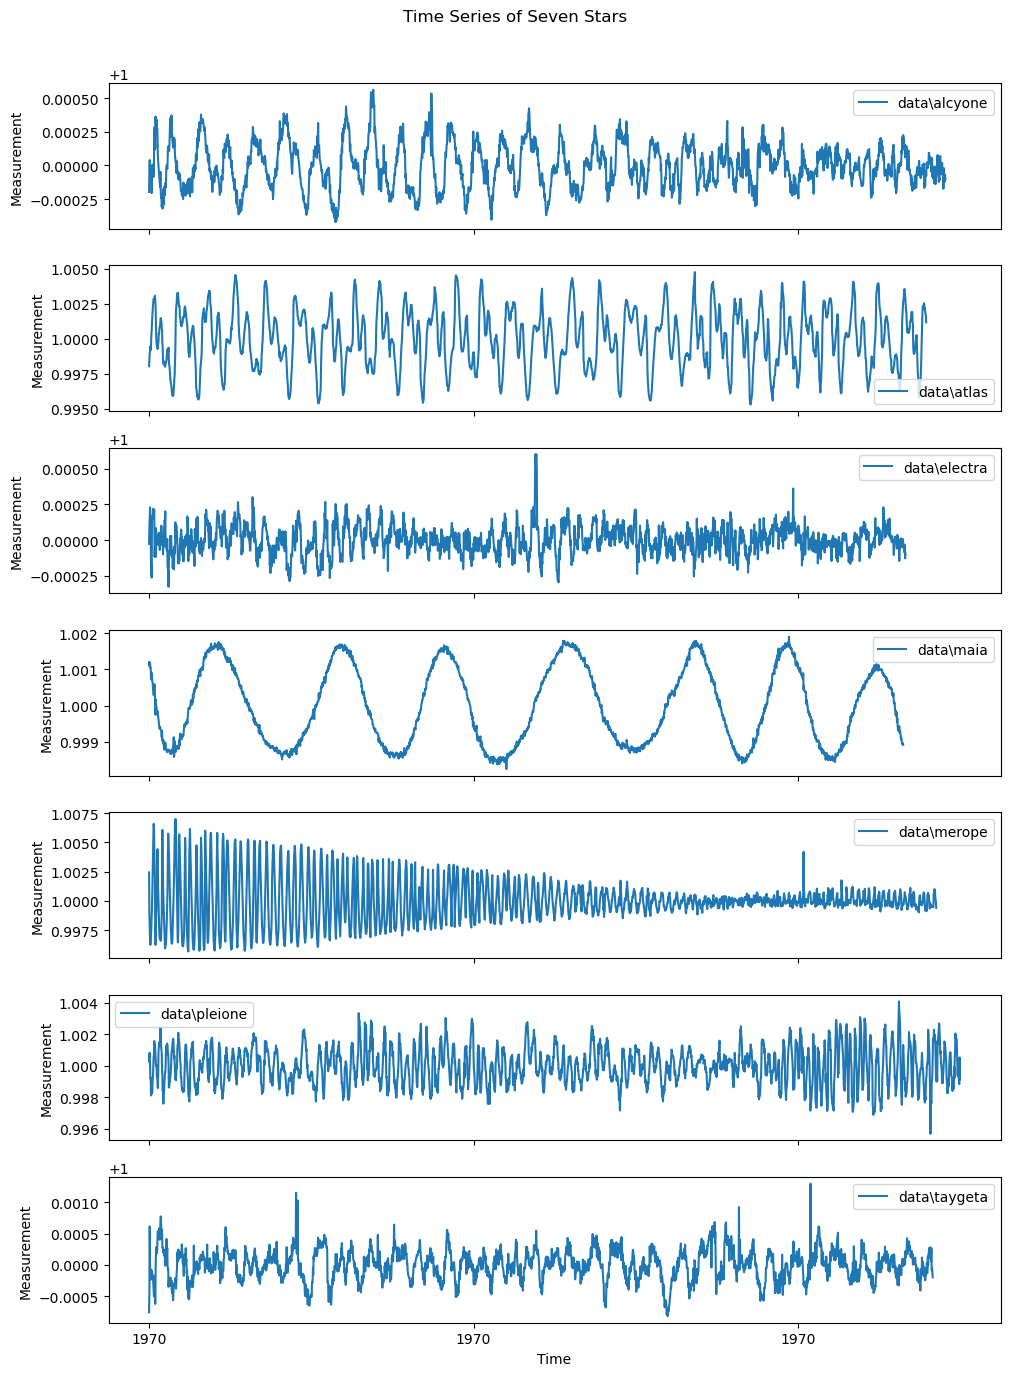

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get a list of all CSV files matching the pattern
file_paths = glob.glob("./data/*recreated-ts.csv")  # Adjust path if necessary
file_paths.sort()  # Ensure consistent ordering

# Define figure and subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 14), sharex=True)
fig.suptitle("Time Series of Seven Stars")

# Loop through files and plot each in its respective subplot
for ax, file_path in zip(axes, file_paths):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Extract time and measurement columns
    time_col = df.columns[0]  # Assuming first column is time
    value_col = df.columns[2]  # Assuming second column is the measurement

    # Convert time column to datetime format
    df[time_col] = pd.to_datetime(df[time_col])

    # Plot the data
    ax.plot(df[time_col], df[value_col], label=file_path.split("/")[-1].replace("-recreated-ts.csv", ""))
    ax.set_ylabel("Measurement")
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel("Time")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("light_curves_figure.png", dpi=300, bbox_inches="tight")
plt.show()


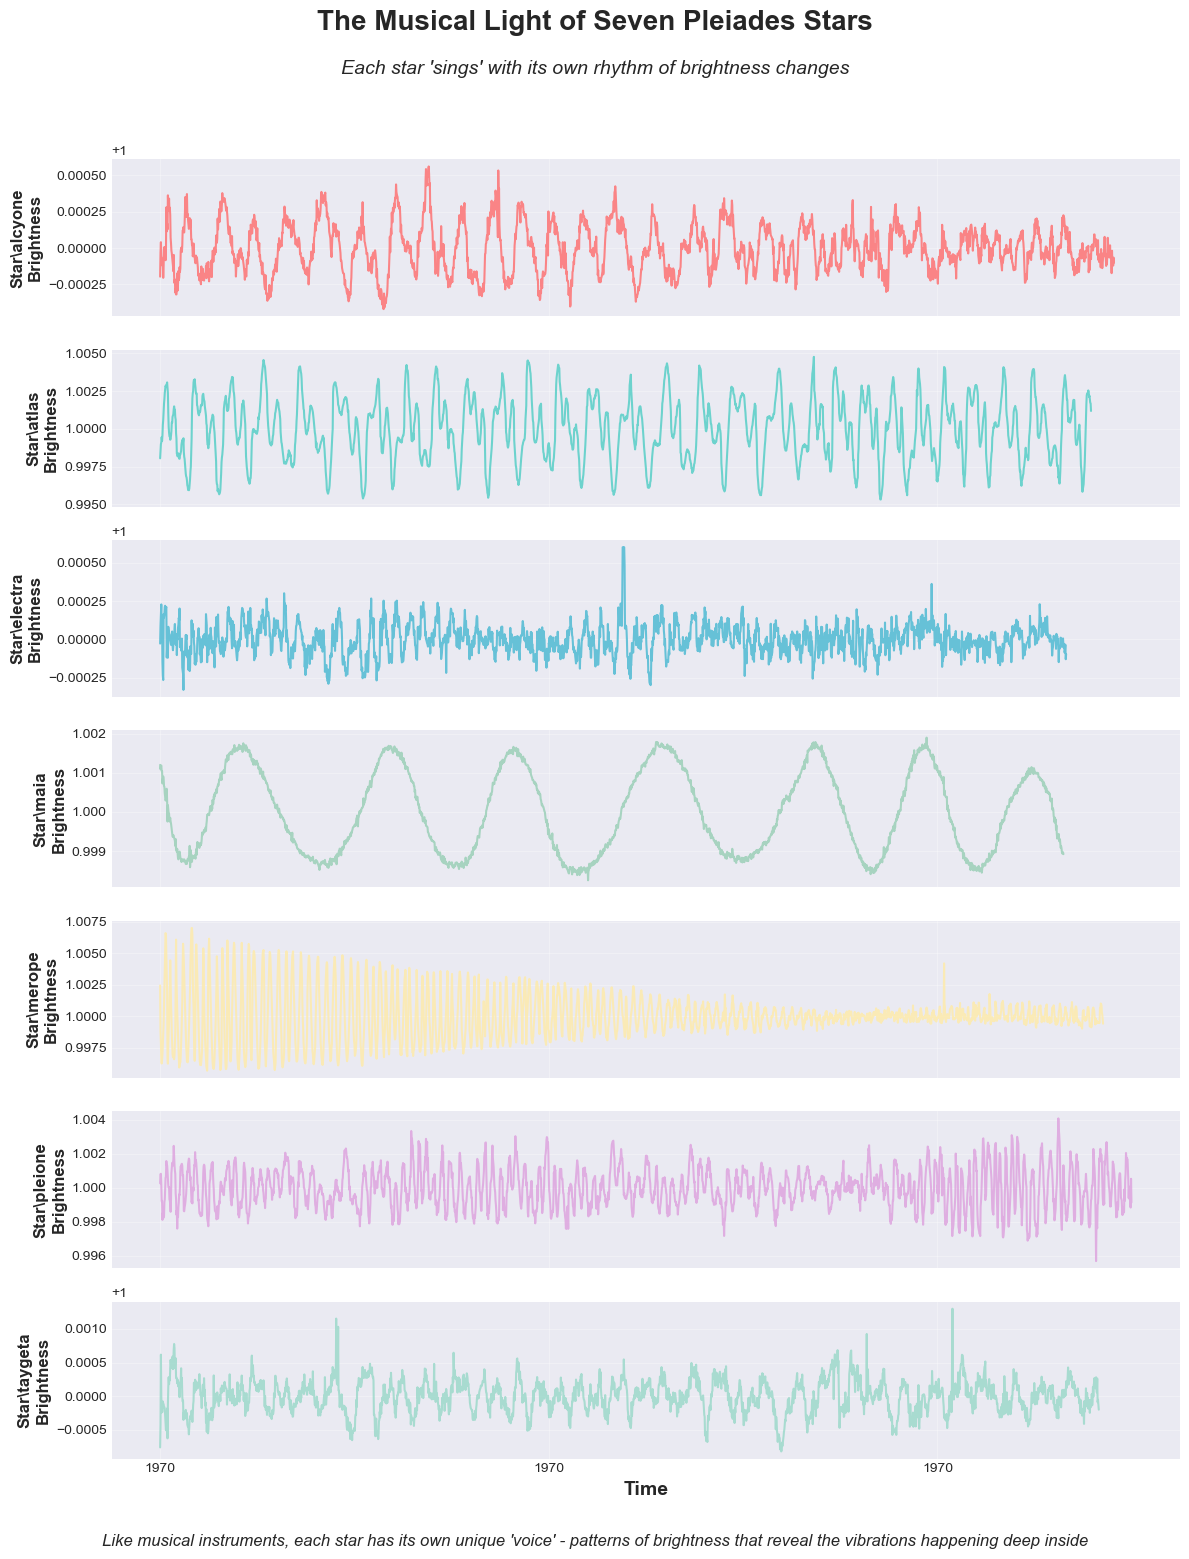

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# Set up a more appealing style
plt.style.use('seaborn-v0_8-darkgrid')  # or try 'seaborn-v0_8-whitegrid'
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 16), sharex=True)
fig.suptitle("The Musical Light of Seven Pleiades Stars", fontsize=20, fontweight='bold', y=0.98)

# Add a subtitle explaining what we're seeing
fig.text(0.5, 0.94, "Each star 'sings' with its own rhythm of brightness changes", 
         ha='center', fontsize=14, style='italic')

for i, (ax, file_path) in enumerate(zip(axes, file_paths)):
    df = pd.read_csv(file_path)
    time_col = df.columns[0]
    value_col = df.columns[2]
    df[time_col] = pd.to_datetime(df[time_col])
    
    # Get star name and clean it up
    star_name = file_path.split("/")[-1].replace("-recreated-ts.csv", "").replace("data", "Star")
    
    # Plot with thicker lines and appealing colors
    ax.plot(df[time_col], df[value_col], color=colors[i], linewidth=1.5, alpha=0.8)
    
    # Improve labeling
    ax.set_ylabel(f"{star_name}\nBrightness", fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Remove scientific notation and add better tick formatting
    ax.ticklabel_format(style='plain', axis='y')

# Better x-axis
axes[-1].set_xlabel("Time", fontsize=14, fontweight='bold')

# Add explanatory text
fig.text(0.5, 0.02, "Like musical instruments, each star has its own unique 'voice' - " +
         "patterns of brightness that reveal the vibrations happening deep inside", 
         ha='center', fontsize=12, style='italic', wrap=True)

plt.tight_layout(rect=[0, 0.04, 1, 0.93])
plt.savefig("stellar_music_light_curves.png", dpi=300, bbox_inches="tight", 
            facecolor='white', edgecolor='none')
plt.show()

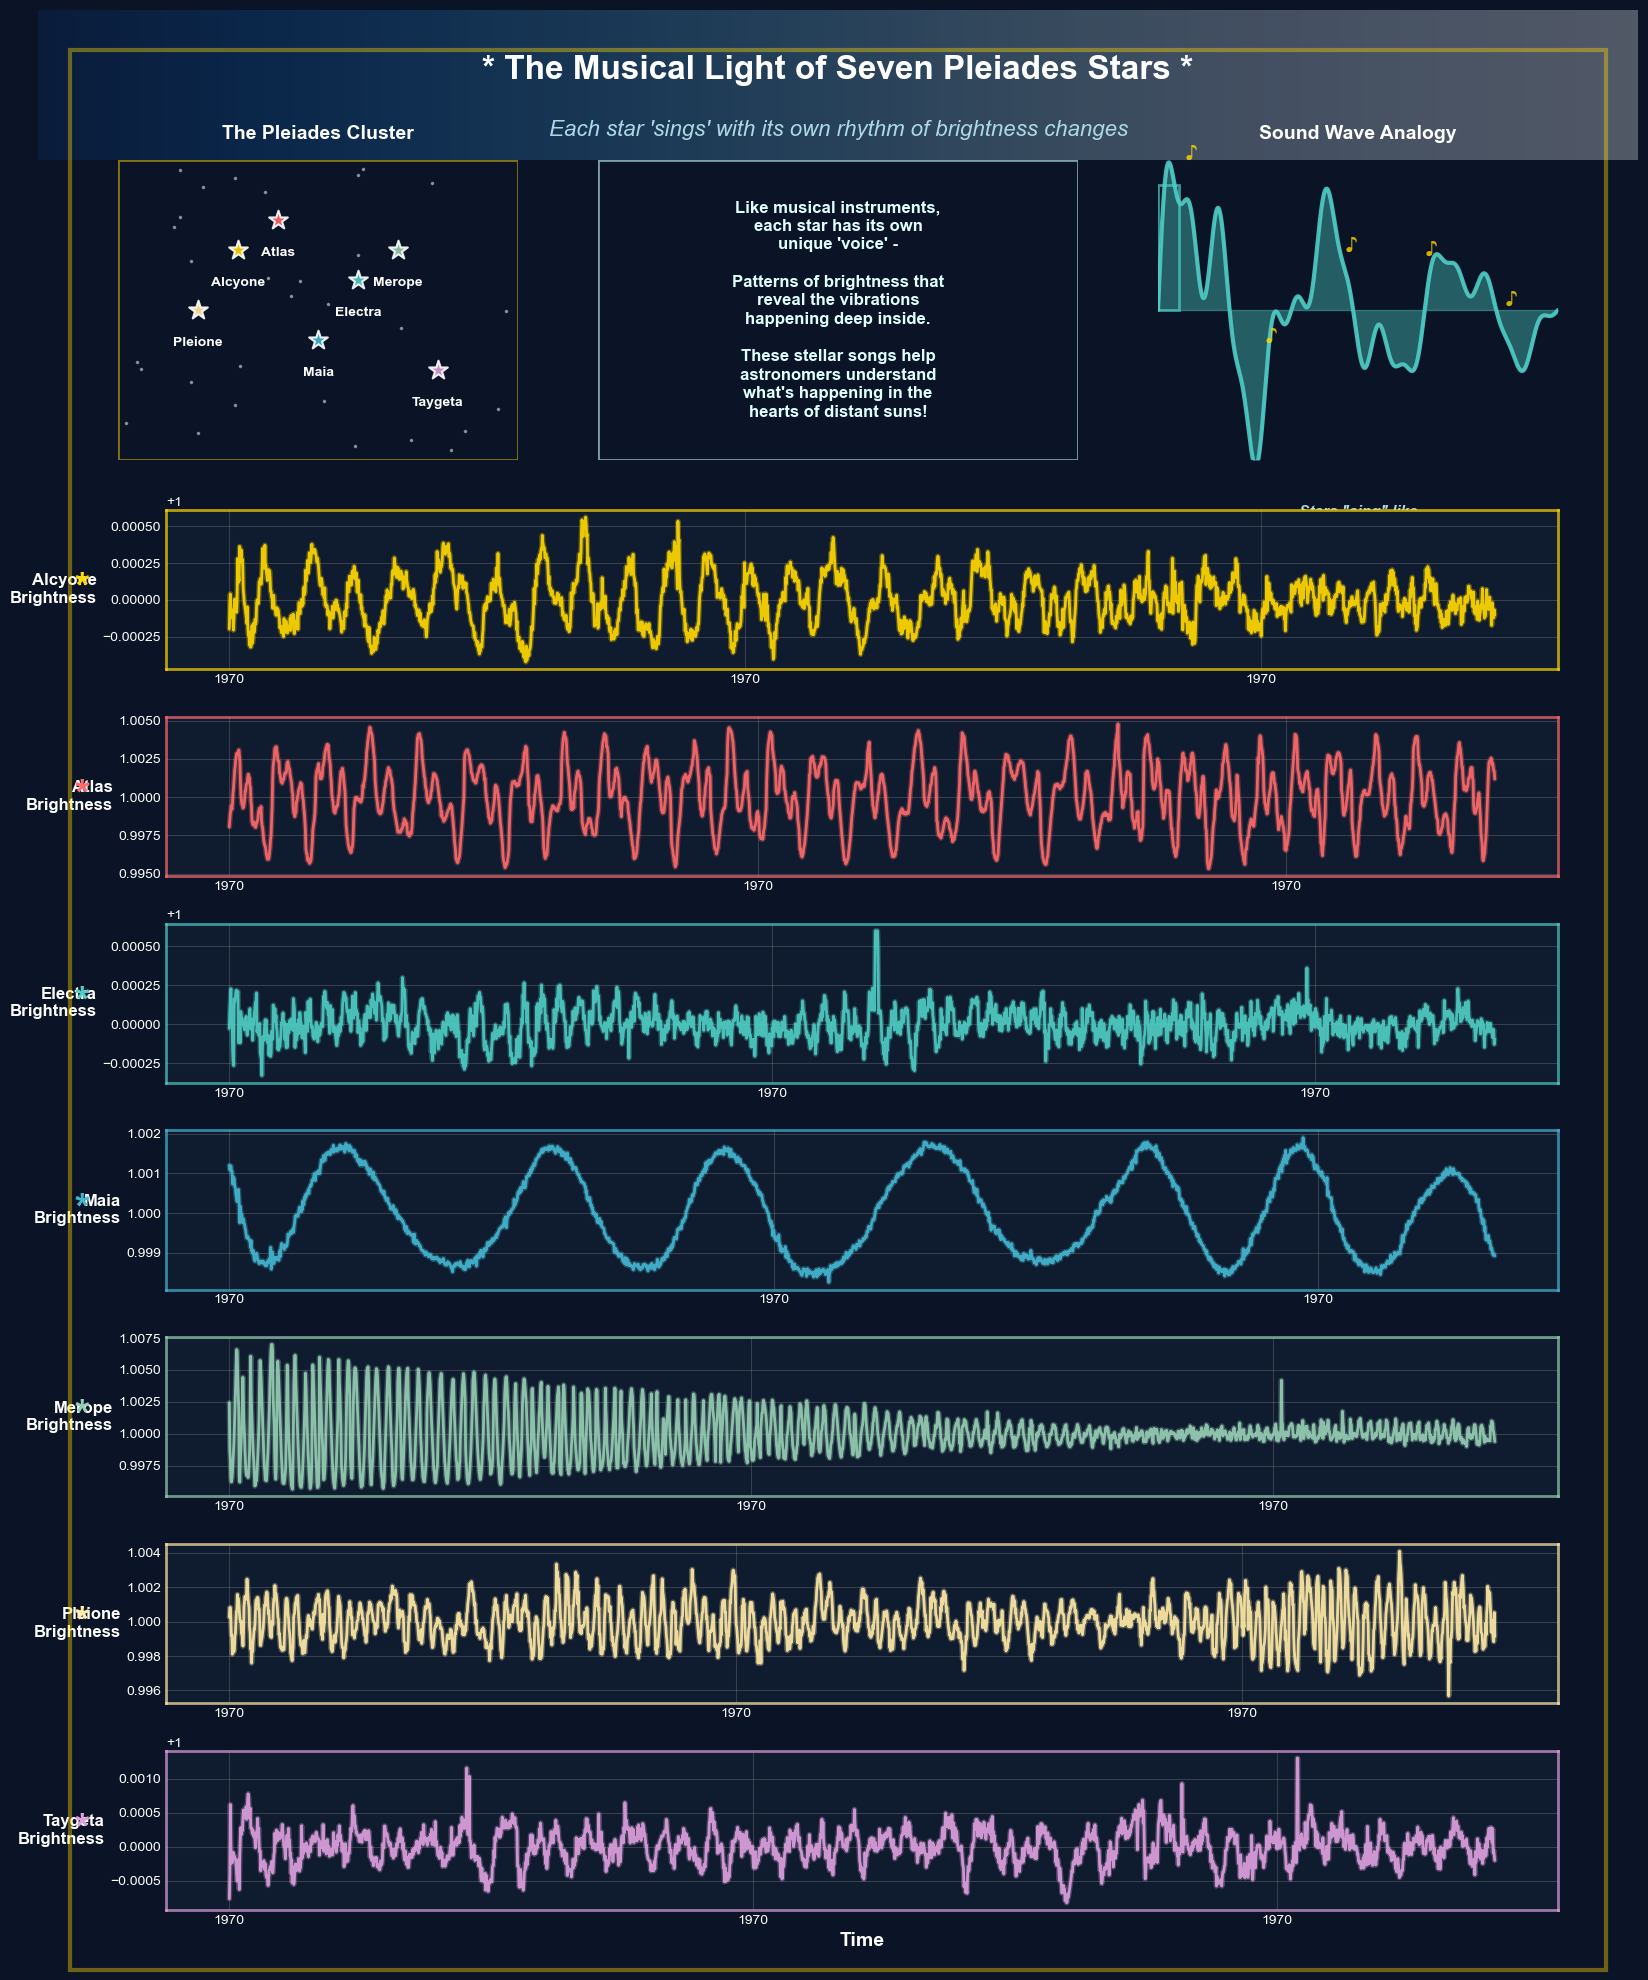

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches

# Use standard Windows fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Calibri', 'DejaVu Sans']
plt.rcParams['font.size'] = 10

# Warm, space-inspired color palette
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

# Create figure with space background
fig = plt.figure(figsize=(16, 20))
fig.patch.set_facecolor('#0B1426')  # Deep space blue

# Create the layout: header section + light curves
# Header takes top 25%, light curves take bottom 75%
header_height = 0.25
curves_height = 0.70
bottom_margin = 0.05

# ===== HEADER SECTION =====
# Main title
title_ax = fig.add_axes([0, 1-header_height*0.3, 1, header_height*0.3])
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
title_ax.imshow(gradient, aspect='auto', cmap='Blues_r', alpha=0.3)
title_ax.text(0.5, 0.6, "* The Musical Light of Seven Pleiades Stars *", 
              ha='center', va='center', transform=title_ax.transAxes,
              fontsize=24, fontweight='bold', color='white')
title_ax.text(0.5, 0.2, "Each star 'sings' with its own rhythm of brightness changes", 
              ha='center', va='center', transform=title_ax.transAxes,
              fontsize=16, style='italic', color='lightblue')
title_ax.axis('off')

# Header content area (3 columns: cluster, text, sound wave)
header_content_ax = fig.add_axes([0, 1-header_height, 1, header_height*0.7])
header_content_ax.set_facecolor('#0B1426')
header_content_ax.axis('off')

# 1. PLEIADES CLUSTER (Left third)
cluster_ax = fig.add_axes([0.05, 1-header_height*0.9, 0.25, header_height*0.6])
cluster_ax.set_facecolor('#0B1426')

pleiades_positions = [
    (0.3, 0.7), (0.4, 0.8), (0.6, 0.6), (0.5, 0.4), 
    (0.7, 0.7), (0.2, 0.5), (0.8, 0.3)
]
pleiades_names = ['Alcyone', 'Atlas', 'Electra', 'Maia', 'Merope', 'Pleione', 'Taygeta']

for i, (x, y) in enumerate(pleiades_positions):
    cluster_ax.scatter(x, y, c=colors[i], s=200, alpha=0.9, marker='*', 
                      edgecolors='white', linewidth=1.5)
    cluster_ax.text(x, y-0.12, pleiades_names[i], ha='center', fontsize=10, 
                   color='white', weight='bold')

# Add some background stars
np.random.seed(42)
bg_stars_x = np.random.random(30)
bg_stars_y = np.random.random(30)
cluster_ax.scatter(bg_stars_x, bg_stars_y, c='white', s=10, alpha=0.4, marker='.')

cluster_ax.set_xlim(0, 1)
cluster_ax.set_ylim(0, 1)
cluster_ax.set_title('The Pleiades Cluster', color='white', fontsize=14, 
                    pad=15, weight='bold')
cluster_ax.axis('off')

# Add border around cluster
cluster_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                  edgecolor='gold', facecolor='none', alpha=0.5)
cluster_ax.add_patch(cluster_border)

# 2. EXPLANATORY TEXT (Middle third)
text_ax = fig.add_axes([0.35, 1-header_height*0.9, 0.3, header_height*0.6])
text_ax.set_facecolor('#1a2332')
text_ax.text(0.5, 0.5, 
             "Like musical instruments,\neach star has its own\nunique 'voice' -\n\n" +
             "Patterns of brightness that\nreveal the vibrations\nhappening deep inside.\n\n" +
             "These stellar songs help\nastronomers understand\nwhat's happening in the\nhearts of distant suns!",
             ha='center', va='center', transform=text_ax.transAxes,
             fontsize=12, color='lightcyan', weight='bold',
             linespacing=1.3)
text_ax.axis('off')

# Add border around text
text_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                               edgecolor='lightblue', facecolor='none', alpha=0.7)
text_ax.add_patch(text_border)

# 3. SOUND WAVE (Right third)
sound_ax = fig.add_axes([0.70, 1-header_height*0.9, 0.25, header_height*0.6])
sound_ax.set_facecolor('#0F1B2E')

# Create sound wave
t = np.linspace(0, 6*np.pi, 1000)
wave1 = np.sin(t) * np.exp(-t/15)
wave2 = 0.6 * np.sin(2.5*t) * np.exp(-t/12)
wave3 = 0.3 * np.sin(5*t) * np.exp(-t/10)
combined_wave = wave1 + wave2 + wave3

sound_ax.plot(t, combined_wave, color='#4ECDC4', linewidth=3, alpha=0.9)
sound_ax.fill_between(t, combined_wave, alpha=0.4, color='#4ECDC4')

# Add some "musical" elements
for i in range(5):
    note_x = i * np.pi * 1.2 + np.pi/2
    note_y = np.sin(note_x) * np.exp(-note_x/15) + 0.3
    sound_ax.text(note_x, note_y, 'â™ª', fontsize=16, color='gold', ha='center', 
                 alpha=0.8, weight='bold')

sound_ax.set_xlim(0, 6*np.pi)
sound_ax.set_ylim(-1.2, 1.2)
sound_ax.set_title('Sound Wave Analogy', color='white', fontsize=14, 
                  pad=15, weight='bold')
sound_ax.text(0.5, -0.15, 'Stars "sing" like\ninstruments!', 
              transform=sound_ax.transAxes, ha='center', va='top',
              color='lightblue', fontsize=11, style='italic', weight='bold')
sound_ax.set_xticks([])
sound_ax.set_yticks([])
sound_ax.axis('off')

# Add border around sound wave
sound_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                edgecolor='#4ECDC4', facecolor='none', alpha=0.7)
sound_ax.add_patch(sound_border)

# ===== LIGHT CURVES SECTION =====
# Create gridspec for light curves in the lower portion
gs = fig.add_gridspec(7, 1, top=1-header_height, bottom=bottom_margin, 
                     left=0.08, right=0.95, hspace=0.3)

for i, file_path in enumerate(file_paths):
    ax = fig.add_subplot(gs[i, 0])
    ax.set_facecolor('#0F1B2E')
    
    # Read and process data
    df = pd.read_csv(file_path)
    time_col = df.columns[0]
    value_col = df.columns[2]
    df[time_col] = pd.to_datetime(df[time_col])
    
    star_name = pleiades_names[i] if i < len(pleiades_names) else f"Star {i+1}"
    
    # Plot light curve with glow effect
    ax.plot(df[time_col], df[value_col], color=colors[i], linewidth=2, alpha=0.9)
    ax.plot(df[time_col], df[value_col], color=colors[i], linewidth=4, alpha=0.3)
    
    # Add star symbol
    ax.text(-0.06, 0.5, '*', transform=ax.transAxes, fontsize=28, 
            color=colors[i], va='center', ha='center', weight='bold')
    
    # Style the subplot
    ax.set_ylabel(f"{star_name}\nBrightness", fontsize=12, fontweight='bold', 
                  color='white', rotation=0, ha='right', va='center')
    ax.grid(True, alpha=0.2, color='lightgray')
    ax.tick_params(colors='white', labelsize=10)
    
    # Remove scientific notation
    ax.ticklabel_format(style='plain', axis='y')
    
    # Add colored border
    for spine in ax.spines.values():
        spine.set_edgecolor(colors[i])
        spine.set_alpha(0.7)
        spine.set_linewidth(2)

# Add x-axis label to bottom plot
if len(file_paths) > 0:
    ax.set_xlabel("Time", fontsize=14, fontweight='bold', color='white')

# Add outer frame
outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                               edgecolor='gold', facecolor='none', alpha=0.4, 
                               transform=fig.transFigure)
fig.patches.append(outer_frame)

plt.savefig("stellar_symphony_light_curves_v2.png", dpi=300, bbox_inches="tight", 
            facecolor='#0B1426', edgecolor='none')
plt.show()